<a href="https://colab.research.google.com/github/Ishank2301/Comprehensive-ML-Handbook/blob/main/keras_hyperparameter_tunning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries:

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

tf.config.run_functions_eagerly(True)

# Generate Data:

### 1. Install the Kaggle library

In [2]:
!pip install kaggle --quiet

### 2. Configure your Kaggle API key

Download your `kaggle.json` file from your Kaggle account (Profile -> Account -> Create New API Token).

Then, upload this file to your Colab environment in the directory `~/.kaggle/` and set the correct permissions.

In [3]:
import os
from google.colab import files


# Upload kaggle.json
files.upload()


print("Kaggle API key configured successfully!")

Saving kaggle.json to kaggle.json
Kaggle API key configured successfully!


In [4]:
# Create .kaggle directory if it doesn't exist
!mkdir -p ~/.kaggle
# Move the uploaded kaggle.json to the correct directory
!mv kaggle.json ~/.kaggle/

# Set permissions
!chmod 600 ~/.kaggle/kaggle.json


### 3. Import `kagglehub` and download the dataset



In [5]:
import kagglehub
!kaggle datasets download -d mathchi/diabetes-data-set
!unzip diabetes-data-set.zip

Dataset URL: https://www.kaggle.com/datasets/mathchi/diabetes-data-set
License(s): CC0-1.0
  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 38.0MB/s]
Archive:  diabetes-data-set.zip
  inflating: diabetes.csv            


# Curating the Data:

1.   Performing EDA on the data
2.   Dividingn data into dependant and Independant variable



In [6]:
df  = pd .read_csv('diabetes.csv')

In [7]:
print(df.head())
df.shape

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


(768, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

# Performing Feature Scaling:

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

# Creating Training and Test sets:

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Create our Model:

In [12]:
Model = Sequential()
Model.add(Dense(32,input_dim=8,activation="relu",kernel_regularizer=tf.keras.regularizers.L2(0.03)))
Model.add(Dense(1,activation="linear"))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
Model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
Model.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy'])

In [15]:
from tensorflow.keras.callbacks import EarlyStopping
ES = EarlyStopping(monitor="val_loss",
                   min_delta=0.00001,
                   patience=20,
                   verbose=1,
                   mode="auto",
                   baseline=None,
                   restore_best_weights=True,
                   )

In [16]:
history = Model.fit(X_train, y_train, epochs=1500, validation_data = (X_test,y_test),batch_size=32,verbose=1,callbacks=ES)

Epoch 1/1500


/usr/local/lib/python3.12/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.6640 - loss: 2.3843 - val_accuracy: 0.7273 - val_loss: 1.8612
Epoch 2/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.7472 - loss: 1.9116 - val_accuracy: 0.7597 - val_loss: 1.7359
Epoch 3/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.7611 - loss: 1.5105 - val_accuracy: 0.7727 - val_loss: 1.6416
Epoch 4/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7426 - loss: 1.5691 - val_accuracy: 0.7532 - val_loss: 1.5338
Epoch 5/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.7766 - loss: 1.3336 - val_accuracy: 0.7597 - val_loss: 1.5079
Epoch 6/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.7643 - loss: 1.2659 - val_accuracy: 0.7597 - val_loss: 1.4192
Epoch 7/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.7535 - loss: 1.3855 - val_accuracy: 0.7662 - val_loss: 1.3875
Epoch 8/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.7857 - loss: 1.1373 - val_accuracy: 0.7662 

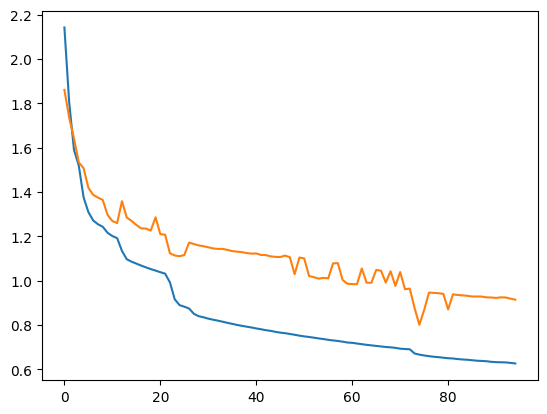

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

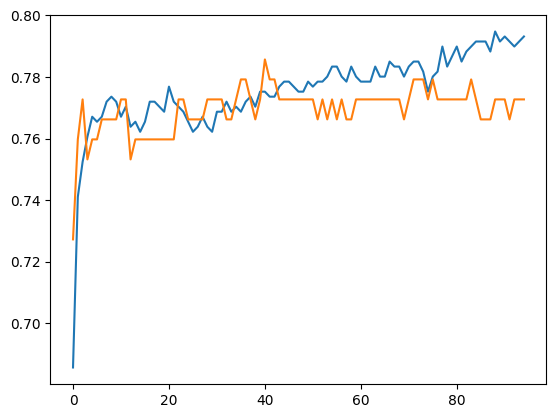

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

# 1. How to select Appropriaate optimizer:

In [19]:
!pip install -U keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 6.7 MB/s eta 0:00:00


In [20]:
import kerastuner as kt

/tmp/ipython-input-1654478174.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [21]:
def build_model(hp):
  model  = Sequential()

  model.add(Dense(32,input_dim=8,activation='relu'))
  model.add(Dense(1,activation='sigmoid'))

  # Create a function that helps us select the optimizer.
  optimizer = hp.Choice('optimizer',values = ['adam', 'sgd','rmsprop', 'adadelta'])
  model.compile(optimizer=optimizer, loss='binary_crossentropy',metrics=['accuracy'])
  return model

In [22]:
tuner = kt.RandomSearch(
    build_model,
    objective='accuracy',
    max_trials=10,
    directory='my_dir',
    project_name='experiment_1',
    overwrite=True
)


In [23]:
tuner.search(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    verbose=1
)

tuner.results_summary()


Trial 4 Complete [00h 00m 08s]
accuracy: 0.767100989818573

Best accuracy So Far: 0.7736156582832336
Total elapsed time: 00h 00m 35s
Results summary
Results in my_dir/experiment_1
Showing 10 best trials
Objective(name="accuracy", direction="max")

Trial 02 summary
Hyperparameters:
optimizer: adam
Score: 0.7736156582832336

Trial 03 summary
Hyperparameters:
optimizer: rmsprop
Score: 0.767100989818573

Trial 00 summary
Hyperparameters:
optimizer: sgd
Score: 0.7377850413322449

Trial 01 summary
Hyperparameters:
optimizer: adadelta
Score: 0.6205211877822876


In [24]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'adam'}

In [25]:
model = tuner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.fit(X_train,y_train,batch_size=32,epochs=100,initial_epoch=6,validation_data=(X_test,y_test))

Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7814 - loss: 0.4618 - val_accuracy: 0.7532 - val_loss: 0.5271
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.7568 - loss: 0.4751 - val_accuracy: 0.7532 - val_loss: 0.5251
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.7481 - loss: 0.4671 - val_accuracy: 0.7468 - val_loss: 0.5237
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.7685 - loss: 0.4424 - val_accuracy: 0.7403 - val_loss: 0.5240
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.7559 - loss: 0.4464 - val_accuracy: 0.7468 - val_loss: 0.5243
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.7541 - loss: 0.4654 - val_accuracy: 0.7468 - val_loss: 0.5259
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.7454 - loss: 0.4480 - val_accuracy: 0.7403 - val_loss: 0.5262
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.7872 - loss: 0.4313 - val_accurac

# How to select best number of neurons in a hidden layer:

In [28]:
def build_model(hp):
  model = Sequential()
  # The functioon unit here helps us to determine efficiently the best number of Neurons in a hidden layer.
  units = hp.Int('units',min_value=8,max_value=128,step=8)  # Minimum 8 neurons, an increase of 8 if we wan tmore and max 128 neurons are possible.
  model.add(Dense(units=units,activation='relu',input_dim=8))
  model.add(Dense(1,activation='sigmoid'))

  model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
  return model

In [29]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    directory='my_dir',
    project_name='experiment_1',
    overwrite=True
)


In [30]:
tuner.search(X_train,y_train,validation_data=(X_test,y_test),epochs=10)
tuner.results_summary()

Trial 10 Complete [00h 00m 08s]
val_accuracy: 0.7727272510528564

Best val_accuracy So Far: 0.7792207598686218
Total elapsed time: 00h 01m 31s
Results summary
Results in my_dir/experiment_1
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 01 summary
Hyperparameters:
units: 96
Score: 0.7792207598686218

Trial 04 summary
Hyperparameters:
units: 128
Score: 0.7727272510528564

Trial 06 summary
Hyperparameters:
units: 120
Score: 0.7727272510528564

Trial 09 summary
Hyperparameters:
units: 56
Score: 0.7727272510528564

Trial 00 summary
Hyperparameters:
units: 88
Score: 0.7662337422370911

Trial 02 summary
Hyperparameters:
units: 48
Score: 0.7532467246055603

Trial 07 summary
Hyperparameters:
units: 80
Score: 0.7532467246055603

Trial 08 summary
Hyperparameters:
units: 112
Score: 0.7467532753944397

Trial 03 summary
Hyperparameters:
units: 16
Score: 0.7207792401313782

Trial 05 summary
Hyperparameters:
units: 8
Score: 0.7142857313156128


In [31]:
tuner.get_best_hyperparameters()[0].values

{'units': 96}

**As we can see 72 neurons gives us the best possible accuracy**

In [32]:
model.fit(X_train,y_train,batch_size=32,epochs=100,initial_epoch=11)

Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.7840 - loss: 0.4080
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.8043 - loss: 0.3983
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.8119 - loss: 0.3798
Epoch 15/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.8199 - loss: 0.3779
Epoch 16/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8197 - loss: 0.3738
Epoch 17/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8110 - loss: 0.4153
Epoch 18/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8207 - loss: 0.3801
Epoch 19/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.8173 - loss: 0.3954
Epoch 20/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.8326 - loss: 0.3677
Epoch 21/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.7791 - loss: 0.4141
Epoch 22/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8267 - loss: 0.3710
Epoch 23/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 

# How to select best possible number of Hidden layers:

In [33]:
def build_model(hp):
  model = Sequential()
  # Here we see we are using a for loop in range for the num_layers where the min layer is 1 and maximum is 10(Hidden layers).
  for i in range(hp.Int('num_layers',min_value=1,max_value=10)):
    model.add(Dense(72,activation="relu",input_dim=8))
    model.add(Dense(1,activation="sigmoid"))

    model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [34]:
tuner = kt.RandomSearch(build_model,
                        objective='val_accuracy',
                        max_trials=3,
                        directory='my_dir1',
                        project_name='num_layers'
                        )

In [35]:
tuner.search(X_train,y_train,validation_data=(X_test,y_test),epochs=5,verbose=1)
tuner.results_summary()

Trial 3 Complete [00h 00m 04s]
val_accuracy: 0.7727272510528564

Best val_accuracy So Far: 0.7727272510528564
Total elapsed time: 00h 00m 13s
Results summary
Results in my_dir1/num_layers
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 2 summary
Hyperparameters:
num_layers: 2
Score: 0.7727272510528564

Trial 0 summary
Hyperparameters:
num_layers: 4
Score: 0.7597402334213257

Trial 1 summary
Hyperparameters:
num_layers: 9
Score: 0.7597402334213257


In [36]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 2}

**As we can the best possible number of hidden layers are 7**

In [37]:
model = tuner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


# Adjusting activation function for better Selection:

*   Added dropout layers
*   Used String method fpr better output collection of tuner.search



In [42]:
def build_model(hp):
  model = Sequential()
  counter = 0
  for i in range(hp.Int("num_layers", min_value=1, max_value=10)):
    # The i here moves or increases as number of hidden layer increases(As i is fully dependant on number of hidden layers).
    if counter == 0:
      model.add(Dense(hp.Int('units' + str(i),min_value=8,max_value=128,step=8), # The str(i) is here to put the number as string in fron tof unit(unit1,unit2_____)
                      activation=hp.Choice('activation'+str(i), values=['relu', 'tanh', 'sigmoid']), input_dim=8))
      model.add(Dropout(hp.Choice('dropout' + str(i),values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
    else:
       model.add(Dense(hp.Int('units' + str(i),min_value=8,max_value=128,step=8),
                      activation=hp.Choice('activation'+str(i), values=['relu', 'tanh', 'sigmoid'])))
       model.add(Dropout(hp.Choice('dropout' + str(i),values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))

    counter+=1

  model.add(Dense(1,activation="sigmoid"))


  model.compile(optimizer=hp.Choice('optimizer',values=['rmsprop','adam','sgd', 'nadam','adadelta']),
                    loss='binary_crossentropy',
                    metrics=['accuracy'])
  return model

In [43]:
tuner = kt.RandomSearch(build_model,
                        objective='val_accuracy',
                        max_trials=5,
                        directory='my_dir',
                        project_name='last_hope')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
tuner.search(X_train,y_train,validation_data=(X_test,y_test),epochs=5)

Trial 5 Complete [00h 00m 20s]
val_accuracy: 0.6428571343421936

Best val_accuracy So Far: 0.7532467246055603
Total elapsed time: 00h 01m 19s


In [45]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 1,
 'units0': 128,
 'activation0': 'relu',
 'dropout0': 0.5,
 'optimizer': 'rmsprop'}

**As u can see here the number after units and activation are due to str(i) and throught this composite model we can see how we can adjust or tune all our hyper parameters in a single model**

In [46]:
model = tuner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [47]:
model.fit(X_train,y_train,epochs=100,batch_size=32,initial_epoch=6,validation_data=(X_test,y_test))

Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7270 - loss: 0.5170 - val_accuracy: 0.7597 - val_loss: 0.5154
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.7340 - loss: 0.5102 - val_accuracy: 0.7532 - val_loss: 0.5100
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.7606 - loss: 0.4843 - val_accuracy: 0.7662 - val_loss: 0.5073
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.7614 - loss: 0.4952 - val_accuracy: 0.7662 - val_loss: 0.5058
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.7624 - loss: 0.4886 - val_accuracy: 0.7532 - val_loss: 0.5042
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.8129 - loss: 0.4320 - val_accuracy: 0.7468 - val_loss: 0.5034
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.7771 - loss: 0.4516 - val_accuracy: 0.7468 - val_loss: 0.5042
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.7654 - loss: 0.4539 - val_accurac